In [ ]:
# what happens if G is highly correlated with E?

In [1]:
import os,sys,glob,gzip
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns

In [4]:
df=pd.DataFrame()
df['pheno']= np.random.rand(100) * 2  # phenotype
df['G']= df['pheno'] + (np.random.randn(100) * 0.1)  # genotype
df['E']= df['pheno'] + (np.random.randn(100) * 0.1)  # environment

In [6]:
df

,pheno,G,E
0,1.370537,1.453298,1.316966
1,1.710082,1.670611,1.559275
2,0.404325,0.467789,0.403318
3,1.819003,1.808865,1.816096
4,1.037080,1.020559,1.048398
...,...,...,...
95,1.774846,1.770288,1.800224
96,1.649242,1.888688,1.387818
97,0.085356,0.223417,-0.011726
98,1.502538,1.589669,1.534513


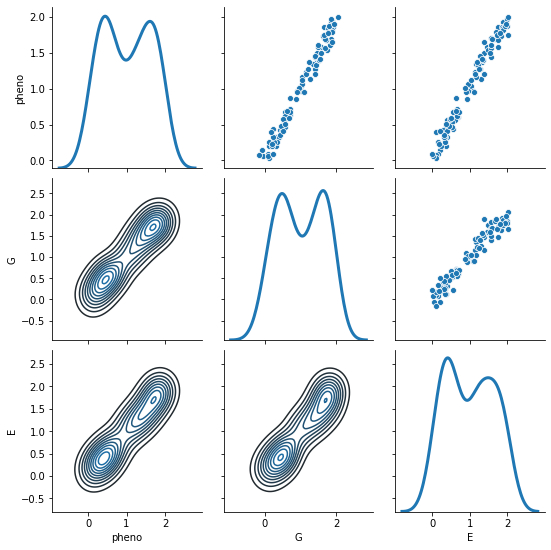

In [8]:
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [9]:
df['GxE']= df['G'] * df['E']

In [10]:
# OLS
X=st.zscore(df.reindex(columns=['G', 'E', 'GxE']))
X=sm.add_constant(X)
y=st.zscore(df['pheno']).reshape(-1, 1)
reg=sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2711.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.27e-92
Time:                        18:35:24   Log-Likelihood:                 80.667
No. Observations:                 100   AIC:                            -153.3
Df Residuals:                      96   BIC:                            -142.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.006e-16      0.011   9.13e-15      1.000      -0.022       0.022
x1             0.5104      0.048     10.570      0.000       0.415       0.606
x2             0.4888      0.058      8.381      0.000       0.373       0.605
x3             0.0023      0.051      0.046      0.963      -0.098       0.103
==============================================================================
Omnibus:                       13.135   Durbin-Watson:                   2.490
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.299
Skew:                           0.792   Prob(JB):                     0.000785
Kurtosis:                       3.959   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Interpretation:

"x1" is beta for G
"X2" is beta for E
"x3" is beta for GxE

x1 and x2 has high value, showing x1 and x2 fit phenotype data.
On the other hand, x3 does not have high value.


Conclusions:

If there is a good correlation between G and E,
then beta for GxE will not be high.
But please keep in mind that this is a cheap simulation,
and real data may behave differently.

'''